In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/netflow/CIDDS-001/traffic/preprocessed.csv', index_col='DATE')

df.head()

,DURATION,PROTOCOL,SRC_IP_ADDR,SRC_PORT,DST_IP_ADDR,DST_PORT,PACKETS,BYTES,TOS,ATTACK_TYPE,...,FLAG_0xdf,FLAG_0xda,FLAG_0x52,FLAG_0xd3,FLAG_0x5b,FLAG_0x5a,FLAG_0xd2,FLAG_0xde,FLAG_0x53,FLAG_0xc6
DATE,,,,,,,,,,,,,,,,,,,,,
2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-03-14 17:43:39.011,183418.493,3,43441,8,44021,8,20751,5939.2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
continuous_features = ['DURATION', 'PACKETS', 'BYTES']
label = ['ATTACK_TYPE']

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [5]:
to_normalize = df.loc[:, continuous_features].values

In [6]:
import numpy as np

In [7]:
np.mean(to_normalize), np.std(to_normalize)

(759.3696053122387, 10860.112747121242)

In [8]:
normalized = std_scaler.fit_transform(to_normalize)

In [9]:
np.mean(normalized), np.std(normalized)

(2.4805835360756296e-17, 1.0000000000000004)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [11]:
pca_applied = pca.fit_transform(normalized)

In [12]:
pca_df = pd.DataFrame(data=pca_applied, 
                      columns=['COMPONENT_1', 'COMPONENT_2'],
                      index=df.index
                     )

In [13]:
print(pca_df.shape)
pca_df.head()

(11653215, 2)


,COMPONENT_1,COMPONENT_2
DATE,,
2017-03-14 17:43:26.135,623.233497,183.402897
2017-03-14 17:43:26.135,252.720909,-21.055327
2017-03-14 17:43:26.135,-30.023743,-1.940388
2017-03-14 17:43:26.135,-25.822056,-2.209598
2017-03-14 17:43:39.011,-59.892151,-5.581838


In [14]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.39271761 0.35310109]


In [15]:
pca_df['LABEL'] = df['ATTACK_TYPE']

In [16]:
pca_df.head()

,COMPONENT_1,COMPONENT_2,LABEL
DATE,,,
2017-03-14 17:43:26.135,623.233497,183.402897,0
2017-03-14 17:43:26.135,252.720909,-21.055327,0
2017-03-14 17:43:26.135,-30.023743,-1.940388,0
2017-03-14 17:43:26.135,-25.822056,-2.209598,0
2017-03-14 17:43:39.011,-59.892151,-5.581838,0


In [17]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

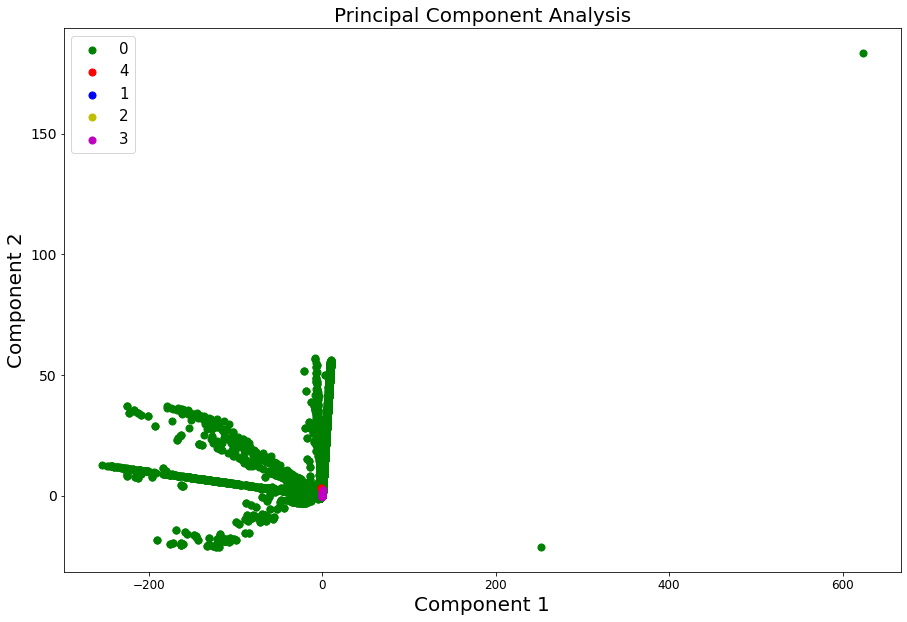

In [21]:
plt.figure()
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
plt.title("Principal Component Analysis", fontsize=20)

targets = pca_df['LABEL'].unique().tolist()
colors = ['g', 'r', 'b', 'y', 'm']


for target, color in zip(targets, colors):

    indices_to_keep = pca_df['LABEL'] == target
    
    plt.scatter(pca_df.loc[indices_to_keep, 'COMPONENT_1'], 
                pca_df.loc[indices_to_keep, 'COMPONENT_2'], 
                c=color, 
                s=50);

plt.legend(targets, prop={'size': 15})